# Example: D-optimal experiment design with LIBSVM datasets
Solve the D-Optimal experiment design problem
$$
\begin{array}{ll}
\textrm{minimize}   & F(x):=\log\left(\det\left(\sum_{i=1}^n x_i V_i V_i^T\right)\right) \\
\textrm{subject to} & \sum_{i=1}^n x_i = 1, \\ 
                    & x_i\geq 0, \quad i=1,\ldots,n
\end{array}
$$
where $V_i\in R^m$ for $i=1,\ldots,n$.

In [1]:
# cd C:\\github\accbpg

C:\github\accbpg


In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 18, 'legend.fontsize':14, 'font.family': 'serif'})
# matplotlib.rcParams.update({'text.usetex': True})

### Compare BPG and ABPG with different values of gamma

In [3]:
import accbpg

# Generate a D-optimal design problem from LIBSVM regression dataset

#filename = "data\\abalone.txt"
#filename = "data\\abalone_scale.txt"
#filename = "data\\bodyfat.txt"
#filename = "data\\bodyfat_scale.txt"
filename = "data\\housing.txt"
#filename = "data\\housing_scale.txt"
#filename = "data\\mpg.txt"
#filename = "data\\mpg_scale.txt"

f, h, L, x0 = accbpg.D_opt_libsvm(filename)

# Solve the problem using BPG and ABPG with different values of gamma (TSE) 
x00, F00, G00, T00 = accbpg.BPG( f, h, L, x0, maxitrs=5000, linesearch=False, ls_ratio=1.2, verbskip=1000)
x10, F10, G10, T10 = accbpg.ABPG(f, h, L, x0, gamma=1.0, maxitrs=5000, theta_eq=True, verbskip=1000)
x15, F15, G15, T15 = accbpg.ABPG(f, h, L, x0, gamma=1.5, maxitrs=5000, theta_eq=True, verbskip=1000)
x20, F20, G20, T20 = accbpg.ABPG(f, h, L, x0, gamma=2.0, maxitrs=5000, theta_eq=True, verbskip=1000)
x22, F22, G22, T22 = accbpg.ABPG(f, h, L, x0, gamma=2.2, maxitrs=5000, theta_eq=True, verbskip=1000)


BPG_LS method for min_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)         Lk       time
     0  -4.137e+01   1.000e+00     0.0
  1000  -5.078e+01   1.000e+00     1.9
  2000  -5.096e+01   1.000e+00     3.6
  3000  -5.102e+01   1.000e+00     5.3
  4000  -5.105e+01   1.000e+00     7.1

ABPG method for minimize_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)       theta        TSG       D(x+,y)     D(z+,z)     time
     0  -4.137e+01   1.000e+00   1.000e+00   1.456e-01   1.456e-01     0.0
  1000  -5.029e+01   9.990e-04   1.754e-03   1.204e-09   6.871e-04     1.9
  2000  -5.061e+01   4.998e-04   1.236e-03   3.256e-10   5.271e-04     4.3
  3000  -5.075e+01   3.332e-04   5.059e-04   1.809e-11   1.073e-04     6.3
  4000  -5.082e+01   2.499e-04   5.336e-04   3.240e-11   2.430e-04     8.2

ABPG method for minimize_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)       theta        TSG       D(x+,y)     D(z+,z)     time
     0  -4.137e+01   1.000e+00   1.000e+00   1.456e-01   1.456e-01     0.0
 

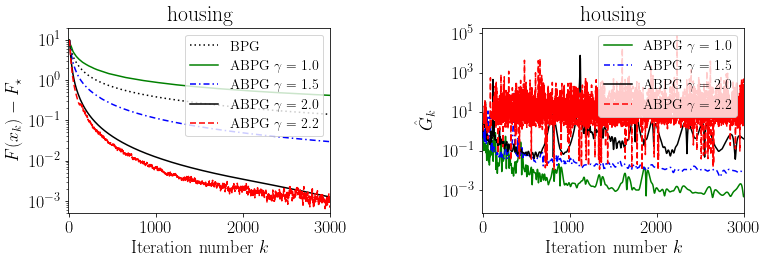

In [4]:
# Plot the objective gap and estimated gains for triangle scaling
fig, _ = plt.subplots(1, 2, figsize=(11, 4))

labels = [r"BPG", r"ABPG $\gamma=1.0$", r"ABPG $\gamma=1.5$", r"ABPG $\gamma=2.0$", r"ABPG $\gamma=2.2$"]
styles = ['k:', 'g-', 'b-.', 'k-', 'r--']
dashes = [[1,2], [], [4,2,1,2], [], [4,2]]

ax1 = plt.subplot(1, 2, 1)
y_vals = [F00, F10, F15, F20, F22]
accbpg.plot_comparisons(ax1, y_vals, labels, x_vals=[], plotdiff=True, yscale="log", xlim=[-10, 3000], ylim=[5e-4, 20], 
                        xlabel=r"Iteration number $k$", ylabel=r"$F(x_k)-F_\star$", legendloc="upper right", 
                        linestyles=styles, linedash=dashes)
plt.title('housing')

ax2 = plt.subplot(1, 2, 2)
y_vals = [G10, G15, G20, G22]
accbpg.plot_comparisons(ax2, y_vals, labels[1:], x_vals=[], plotdiff=False, yscale="log", xlim=[-10, 3000], ylim=[], 
                        xlabel=r"Iteration number $k$", ylabel=r'$\hat{G}_k$', legendloc="upper right", 
                        linestyles=styles[1:], linedash=dashes[1:])
plt.title('housing')

plt.tight_layout(w_pad=4)
plt.show()
# pad = 0.05
# extent = ax1.get_tightbbox(fig.canvas.renderer).expanded(1+pad, 1+pad).transformed(fig.dpi_scale_trans.inverted())
# fig.savefig('./figures/housing_gamma.pdf', format='pdf', bbox_inches=extent)
# extent = ax2.get_tightbbox(fig.canvas.renderer).expanded(1+pad, 1+pad).transformed(fig.dpi_scale_trans.inverted())
# fig.savefig('./figures/housing_gamma_gain.pdf', format='pdf', bbox_inches=extent)

### Comparing BPG with line search and adaptive ABPG algorithms

In [5]:
# Solve the problem using BPG w/o line seach and adaptive ABPG with gamma=2 (TSE) 
x00, F00, G00, T00 = accbpg.BPG( f, h, L, x0, maxitrs=5000, linesearch=False, verbskip=1000)
xLS, FLS, GLS, TLS = accbpg.BPG( f, h, L, x0, maxitrs=5000, linesearch=True, ls_ratio=1.2, verbskip=1000)
x20, F20, G20, T20 = accbpg.ABPG(f, h, L, x0, gamma=2.0, maxitrs=5000, theta_eq=True, verbskip=1000)
x2e, F2e, Gamma2e, G2e, T2e = accbpg.ABPG_expo(f, h, L, x0, gamma0=3, maxitrs=5000, theta_eq=True, Gmargin=100, verbskip=1000)
x2g, F2g, G2g, Gdiv2g, Gavg2g, T2g = accbpg.ABPG_gain(f, h, L, x0, gamma=2, maxitrs=5000, G0=0.1, theta_eq=True, verbskip=1000)


BPG_LS method for min_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)         Lk       time
     0  -4.137e+01   1.000e+00     0.0
  1000  -5.078e+01   1.000e+00     2.3
  2000  -5.096e+01   1.000e+00     4.7
  3000  -5.102e+01   1.000e+00     6.8
  4000  -5.105e+01   1.000e+00     8.8

BPG_LS method for min_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)         Lk       time
     0  -4.137e+01   8.333e-01     0.0
  1000  -5.102e+01   4.019e-01     4.3
  2000  -5.109e+01   2.791e-01     8.2
  3000  -5.111e+01   3.349e-01    12.7
  4000  -5.112e+01   4.019e-01    17.0

ABPG method for minimize_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)       theta        TSG       D(x+,y)     D(z+,z)     time
     0  -4.137e+01   1.000e+00   1.000e+00   1.456e-01   1.456e-01     0.0
  1000  -5.115e+01   1.992e-03   1.906e-01   7.285e-10   9.634e-04     2.4
  2000  -5.116e+01   1.000e-03   1.706e+00   7.315e-10   4.287e-04     4.8
  3000  -5.116e+01   1.000e-03   4.041e-01   4.078e-11   1.009e-04    

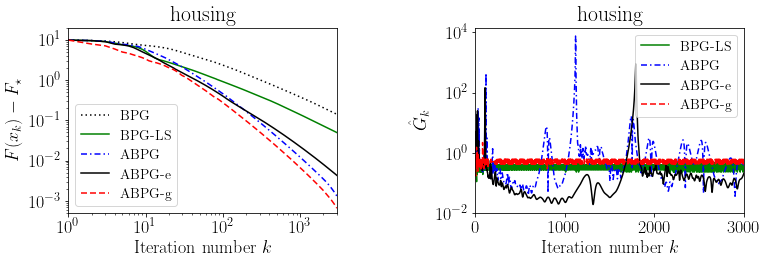

In [6]:
# Plot the objective gap and estimated gains for triangle scaling
fig, _ = plt.subplots(1, 2, figsize=(11, 4))

labels = [r"BPG", r"BPG-LS", r"ABPG", r"ABPG-e", r"ABPG-g"]
styles = ['k:', 'g-', 'b-.', 'k-', 'r--']
dashes = [[1,2], [], [4,2,1,2], [], [4,2]]

ax1 = plt.subplot(1, 2, 1)
y_vals = [F00, FLS, F20, F2e, F2g]
accbpg.plot_comparisons(ax1, y_vals, labels, x_vals=[], plotdiff=True, yscale="log", xscale="log", xlim=[1, 3000], ylim=[5e-4, 20], 
                        xlabel=r"Iteration number $k$", ylabel=r"$F(x_k)-F_\star$", legendloc="lower left", 
                        linestyles=styles, linedash=dashes)
plt.title('housing')

ax2 = plt.subplot(1, 2, 2)
y_vals = [GLS, G20, G2e, G2g]
accbpg.plot_comparisons(ax2, y_vals, labels[1:], x_vals=[], plotdiff=False, yscale="log", xlim=[0, 3000], ylim=[], 
                        xlabel=r"Iteration number $k$", ylabel=r'$\hat{G}_k$', legendloc="upper right", 
                        linestyles=styles[1:], linedash=dashes[1:])
plt.title('housing')

plt.tight_layout(w_pad=4)
plt.show()
# pad = 0.05
# extent = ax1.get_tightbbox(fig.canvas.renderer).expanded(1+pad, 1+pad).transformed(fig.dpi_scale_trans.inverted())
# fig.savefig('./figures/housing_adapt_loglog.pdf', format='pdf', bbox_inches=extent)
# extent = ax2.get_tightbbox(fig.canvas.renderer).expanded(1+pad, 1+pad).transformed(fig.dpi_scale_trans.inverted())
# fig.savefig('./figures/housing_adapt_gain.pdf', format='pdf', bbox_inches=extent)